In [2]:
import numpy as np


class Perceptron(object):
    """"
    Классификатор на основе персептрона.
    Параметры
    ---------
    eta : float
    Темп обучения (между 0.0 и 1.0)
    n_iter : int
    Проходы по тренировочному набору данных.
    Атрибуты
    ---------
    w_ : 1 - мерный массив
    Весовые коэффициенты после подгонки.
    errors_ : список
    Число случаев ошибочной классификации в каждой эпохе.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """
        Выполняет подгонку модели под тренировочные данные.
        Параметры
        ---------
        Х : {массивоподобный) , форма = [n_samples , n_ features]
        тренировочные векторы , где
        n_samples - число образцов и
        n_features - число признаков .
        Посути двумерный массив со строками в виде образцов ириса
        и столбцами хранящими значения признаков.
        у : массиво подобный , форма = [n_samples]
        Целевые значения. т.е. проверка
        Возвращает
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1]) 
        """ Заполняем нулями веса, при этом берём число столбцов матрицы X
        и прибавляем 1 дабы оставить один вес для порогового значения update
        """
        self.errors_ = []
        
        """ _ - значит что нам не нужно значение из range(self.n_iter)
        """
        for _ in range(self.n_iter):
            errors = 0
            """
             zip объединяет в кортежи элементы из последовательностей переданных в качестве аргументов
            """
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Рассчитать чистый вход """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Вернуть метку класс а посл е е ди ничного с качка """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [4]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


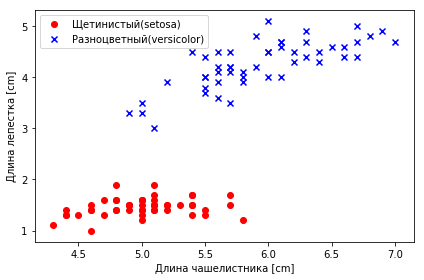

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Щетинистый(setosa)')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='Разноцветный(versicolor)')

plt.xlabel('Длина чашелистника [cm]')
plt.ylabel('Длина лепестка [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./images/02_06.png', dpi=300)
plt.show()

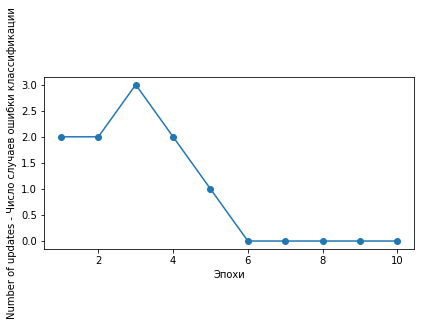

In [6]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Эпохи')
# число ошибочно классифицированных случаев во время обновлений
plt.ylabel('Number of updates - Число случаев ошибки классификации')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

In [7]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # настроить генератор маркеров и палитру цветов
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # вывести поверхность решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # показать образцы классов
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

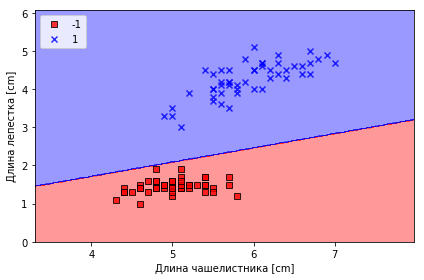

In [8]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Длина чашелистника [cm]')
plt.ylabel('Длина лепестка [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()